##  1. Motivation: 
We want to understand how the coefficient $\rho_{j}^{2} = \frac{g_{j}^2}{\|v_{j}\|^2} = \frac{\|w_{j}\|^{2}}{\|v_{j}\|^{2}}$ in weight normalization change in each layer as traning progresses. We look into how $g_{j}^2$,$ \|v_{j}\|^2$, and   $\rho_{j}$ change along the way. 

#### Recall the relationship of reparametrized  model and original model:


IF this equation is not showing up. Check image: Equation10 

$ \begin{bmatrix} \delta w_{0j}\\ \delta \mathbf{w}_{j} \end{bmatrix} =\begin{bmatrix} 1 & \mathbf{0} \\ \mathbf{0}^{T} & \bigg[\frac{\mathbf{w}_{j}\mathbf{w}_{j}^{T}}{\|\mathbf{w}_{j}\|^{2}}+\frac{g^{2}}{\|\mathbf{v}_{j}\|^{2}}\bigg(\mathbf{I}-\frac{\mathbf{w}_{j}\mathbf{w}_{j}^{T}}{\|\mathbf{w}_{j}\|^{2}}\bigg)\bigg] \end{bmatrix} \begin{bmatrix} \textstyle \big<\frac{\partial E}{\partial w_{0j}}\big>\\ \textstyle \big<\frac{\partial E}{\partial \mathbf{w}_{j}}\big> \end{bmatrix} $

## 2.  Experiment details:
We did experiment on dataset CIFAR-10 (50,000 trainning set, 10,000 test) and used the standard setup in LeNet (shown as below), i.e., 

- SGD with momuemtom =0.0 and batch-size = 128 images for training ( batch-size = 100 images for testing). 

- Learning rate lr = 0.1 at the first 99 epochs, lr = 0.01 at epochs 100 - 199 , lr = 0.001 at epochs 200 - 299.  


#### LeNet:

  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  
  (fc1): Linear (400 -> 120)
  
  (fc2): Linear (120 -> 84)
  
  (fc3): Linear (84 -> 10)


### 2. 1 The loss and accuracy in trainning and testing set. 
###  Undertand the curve 

 - There are 4 plots (1st plot is about trainning loss, and 2nd plot testing accuracy 3rd plot training accuracy, and 4th plot testing loss) 
 - X-axis is Epoch
 - Curvers with different colors means different setup. The legend on the to right or left means the following:
  - LeNet: standard setup as a baseline
  - LeNetBN: use batch normalization in all layers
  - LeNetWN: use weight normalization in all layers
  - LeNetWN1stConvLayer: use weight normalization only in the first layers. 

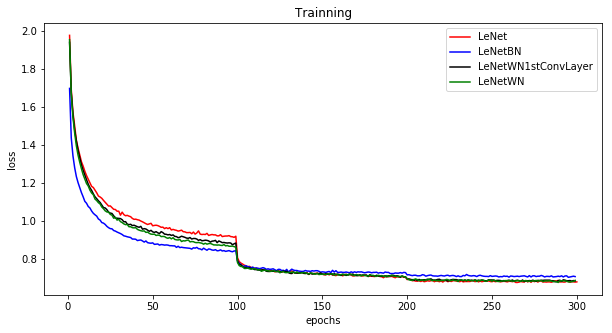

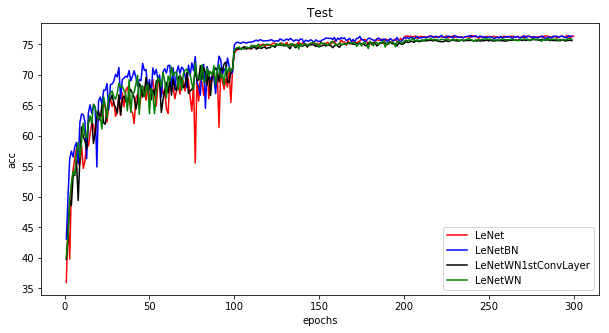

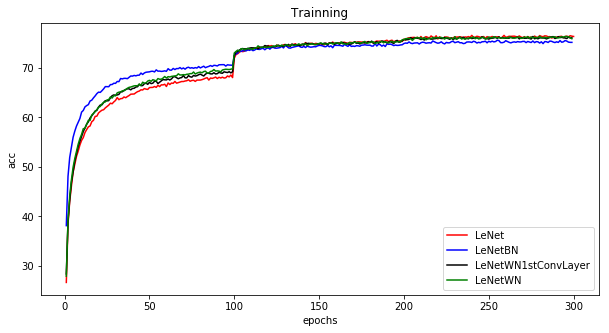

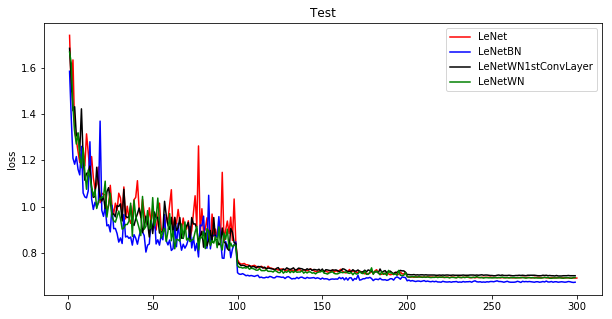

# 3. Overviews

### We look into the dynamics of weight norm that only applied to the first convolution layer intead of all! 

In the first three cells (each cell has 3 plots), we give you the overviews on the dynamics of   $\rho_{j}$, $g_{j}^2$, and $\|v_{j}\|^2$.  The following three cells tells about the dynamics of  $\rho_{j}$, $g_{j}^2$, and $\|v_{j}\|^2$ for three learning rates:
-  lr = 0.1 for first cell
-  lr = 0.01 for second cell
-  lr = 0.001 for third cell

#############################################################################################
#### Undertand the three plots in each cell . Note first that ALL 3 plots share the same X-axis and Y-axis: 
- Y-axis is the Epoch. 
- X-axis is the layer in LeNet. Number 0-5 are the first connolutional layers;  Number 6-21 are the second connolutional layers;   Number 22-141 are the first fully connected layers;  Number 142-225 are the second fully connceted layers (we ommitted dynamcis at the last fully connceted layers).
- Z-axis is the value in  $\rho_{j}$ (Left), $g_{j}$ (Middle), and $\|v_{j}\|$ (Right) respectively.


### 3.1  Observation: 
#### -- At Learning rate 0.1,  $g_{j}$ (Middle) and $\|v_{j}\|$ (Right) move very similarly (increase most of the cases) for all layers (connvolution and fully connected layers).  While in convolution layers, $\rho_{j}$ varies (some increase, some decrease and the rest fluctuate),  $\rho_{j}$ decrese in fully connected layers!  The reason could be $\|v_{j}\|$  in fully connected layers ($v_{j}\in R^{120}$ in first FC layers and $v_{j}\in R^{80}$ in second FC layers) are much larger than that in convolutional layers ($v_{j}\in R^{5\times 5}$ in first and second Conv layers ).  

#### -- At Learning rates 0.01 and 0.001, in most of the cases,  $g_{j}$ (Middle) flatten with little upward trends (most of the cases)  and $\|v_{j}\|$ (Right)  decrease in all layers. As consequence,   $g_{j}$ increseas.


<IPython.core.display.Javascript object>


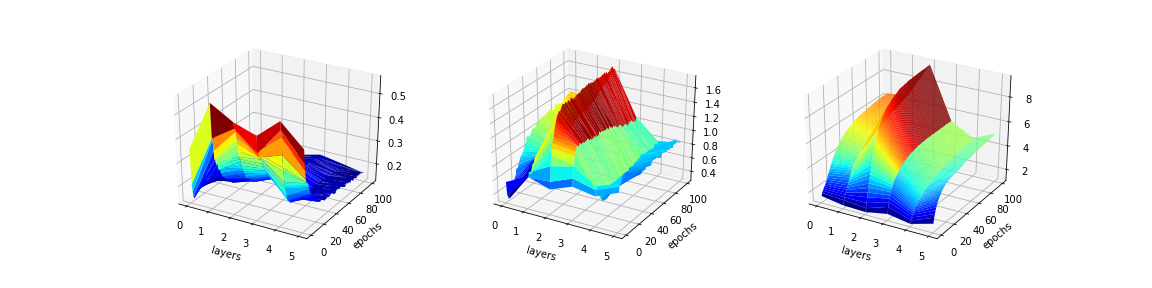

In [28]:
plot3d(filename[0],layers_start = 0,layers_end = 6, image = 'surface')

<IPython.core.display.Javascript object>


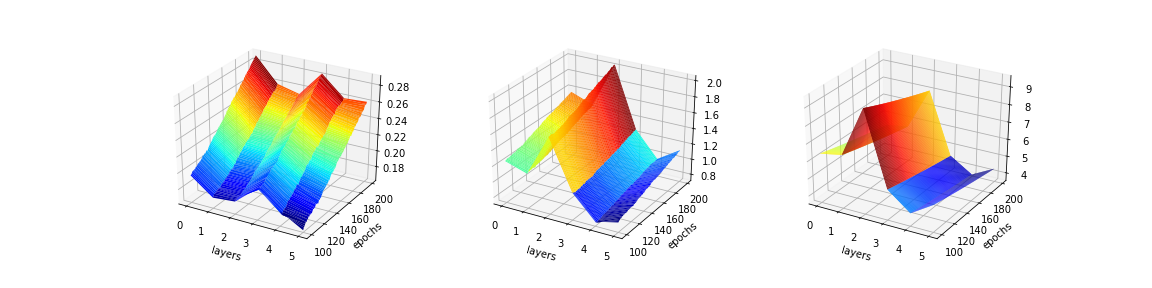

In [29]:
plot3d(filename[1],layers_start = 0,layers_end = 6, image = 'surface')

<IPython.core.display.Javascript object>


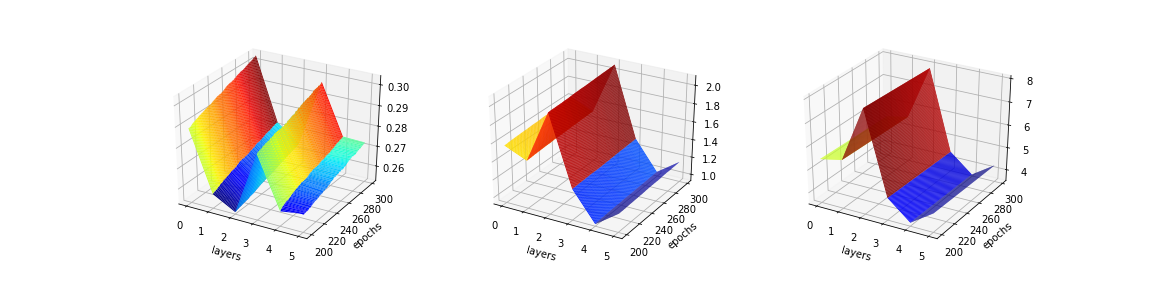

In [30]:
plot3d(filename[2],layers_start = 0,layers_end = 6, image = 'surface')

## 4. Details in WeightNorm Layer

##  WeightNorm at First Convolution Layer (6 neurons: Number 0 - 5)
Note that for the convenience of notation we omitted the subscript  $._{j}$

###    4.1.1 Learning rate = 0.1

- For Learning rate = 0.1, the changes of $g$ and $w$ are fairly similar: the values of $g$ and $\| v \|$ are growing steadily at the first 20 epochs, then start to slow down between epchs 20 -76. Some $g$ continue increase while some $g$ and $\|v\|$  head downward. Becasue their rates of growing  are various,  the ratio $\frac{g}{\|v\|}$  are fairly volatile:  increase for some filters,  decrease or flactuate at certain level for others.


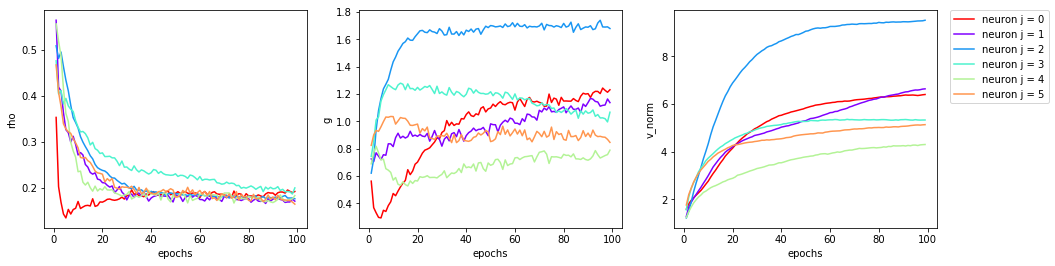

In [31]:
%matplotlib inline
plot2d(filename[0],layers_start =0,layers_end = 6,total_layers = 6)

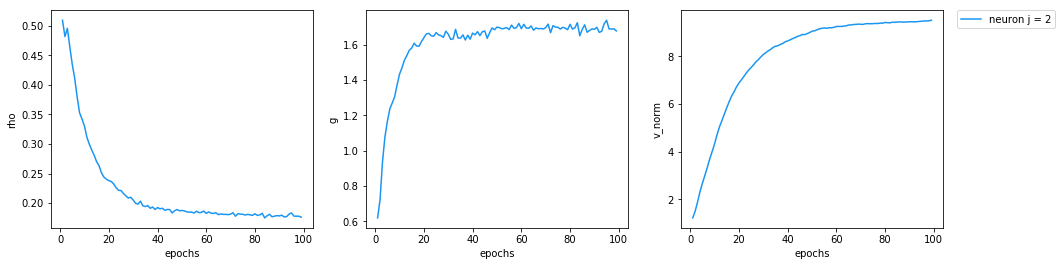

In [32]:
plot2d(filename[0],layers_start =2,layers_end = 3)

###   4.1.2   Learning rate = 0.01
- For Learning rate = 0.01, the values of $g$ flaten at certain level (some are actually continue growing FILTER 5) while $\| v \|$ are ALL decreasing. In results, the ratio $\frac{g}{\|v\|}$  shows increase trends.


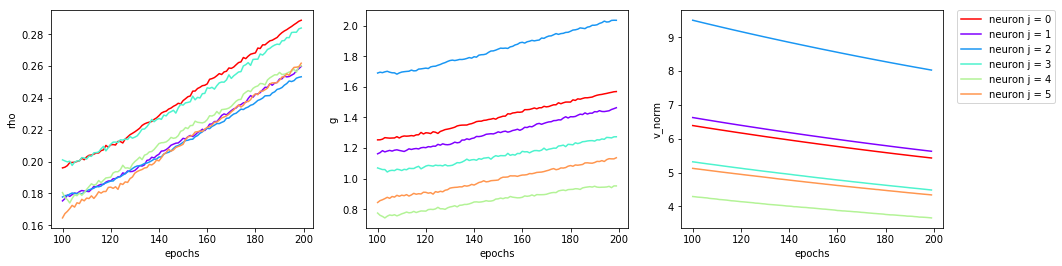

In [33]:
plot2d(filename[1],layers_start =0,layers_end = 6)

### 4.4.1     Learning rate = 0.001

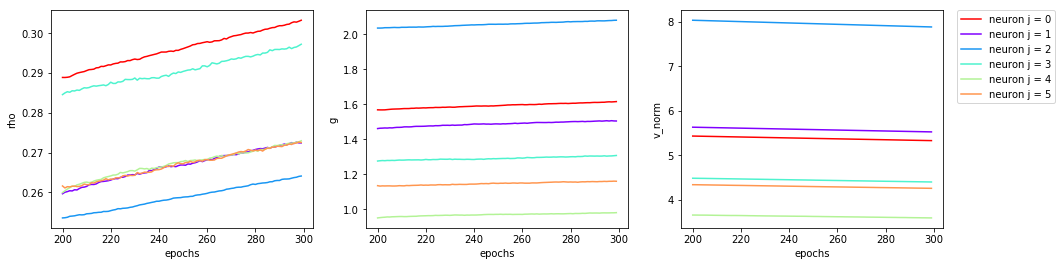

In [35]:
plot2d(filename[2],layers_start = 0,layers_end = 6,total_layers = 6)